In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

In [2]:
pip check

conda-repo-cli 1.0.41 requires requests-mock, which is not installed.Note: you may need to restart the kernel to use updated packages.

gensim 4.3.0 requires fuzzytm, which is not installed.
tables 3.8.0 requires blosc2, which is not installed.
tables 3.8.0 requires cython, which is not installed.
transformers 2.1.1 requires sentencepiece, which is not installed.
conda-repo-cli 1.0.41 has requirement clyent==1.2.1, but you have clyent 1.2.2.
conda-repo-cli 1.0.41 has requirement nbformat==5.4.0, but you have nbformat 5.7.0.
conda-repo-cli 1.0.41 has requirement requests==2.28.1, but you have requests 2.31.0.
python-lsp-black 1.2.1 has requirement black>=22.3.0, but you have black 0.0.
python-lsp-server 1.7.2 has requirement jedi<0.19.0,>=0.17.2, but you have jedi 0.19.0.
spyder 5.4.3 has requirement jedi<0.19.0,>=0.17.2, but you have jedi 0.19.0.


##  Import data

In [3]:
df = pd.read_csv("Walmart.csv")
df.head(20)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [4]:
df.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
#label encoding on the categorical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [7]:
df['Date'] = le.fit_transform(df['Date'])

In [8]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [9]:
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,71.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,41.282743,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,0.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,35.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,71.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,107.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,142.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


## Outliers  analysis

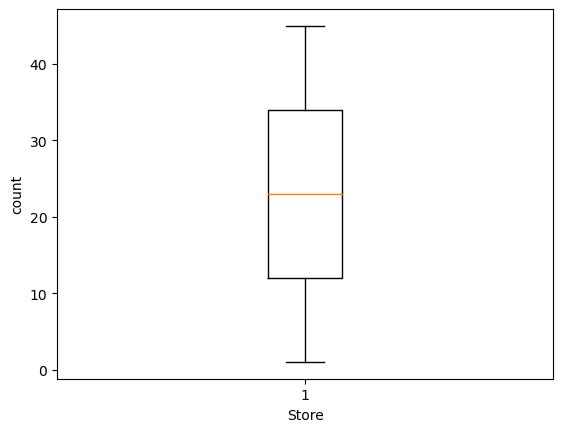

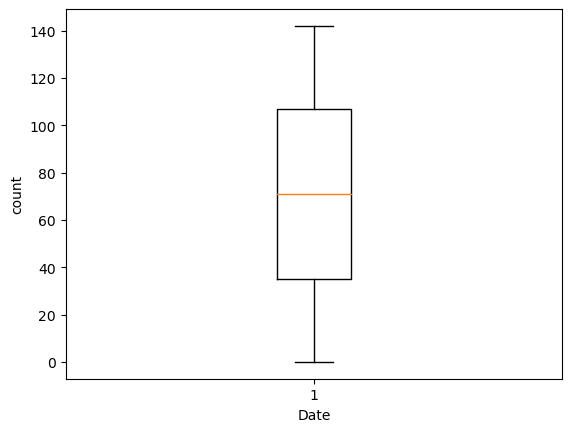

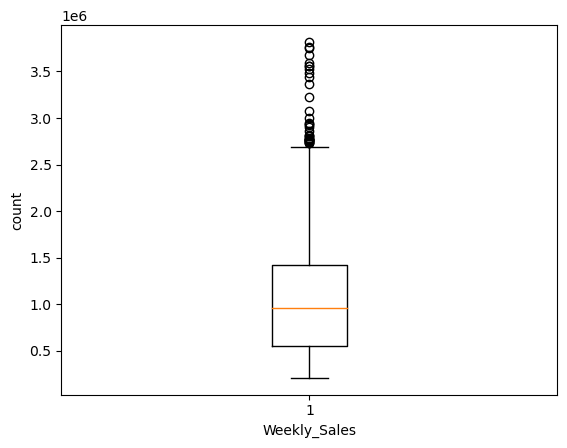

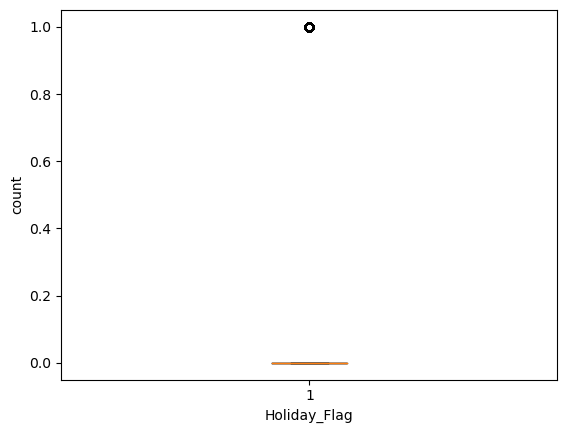

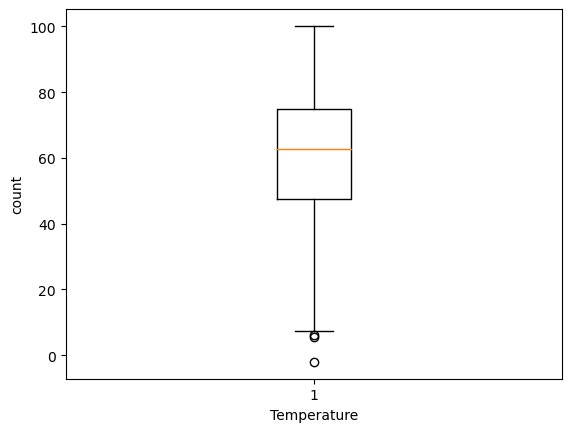

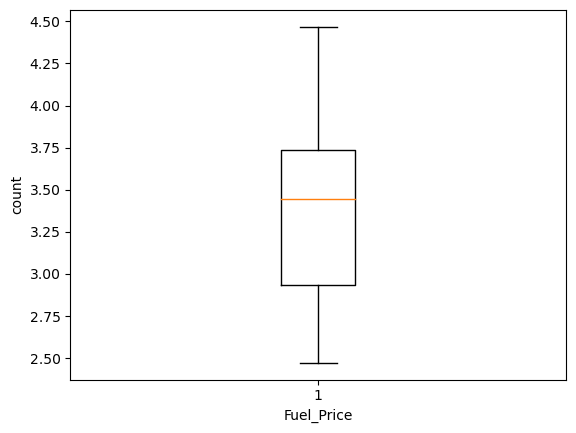

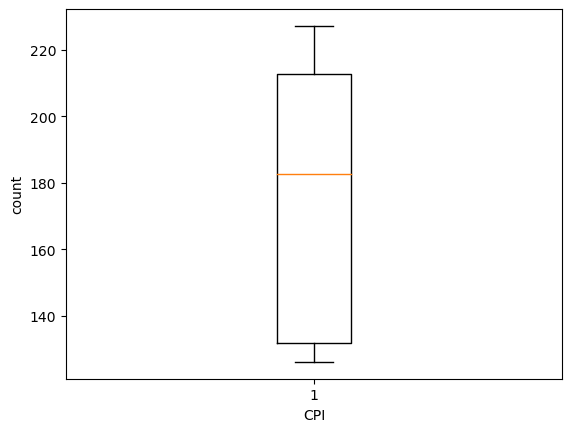

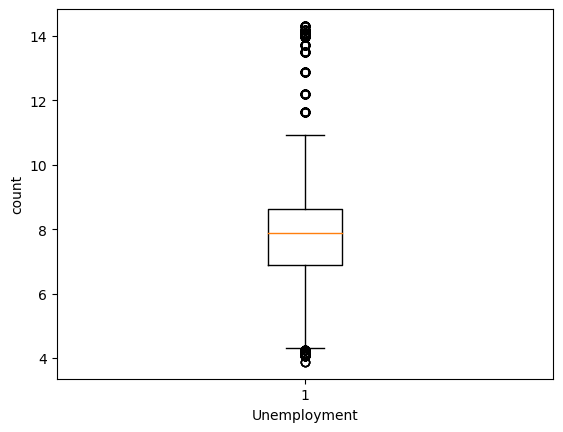

In [10]:
for col_name in df.columns:
    if (df[col_name].dtype != "object"):
        plt.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [11]:
out_cols='Weekly_Sales','Unemployment'

In [12]:
out_cols

('Weekly_Sales', 'Unemployment')

In [13]:
for col in out_cols:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    df=df[(df[col]<=upper) & (df[col]>=lower)]

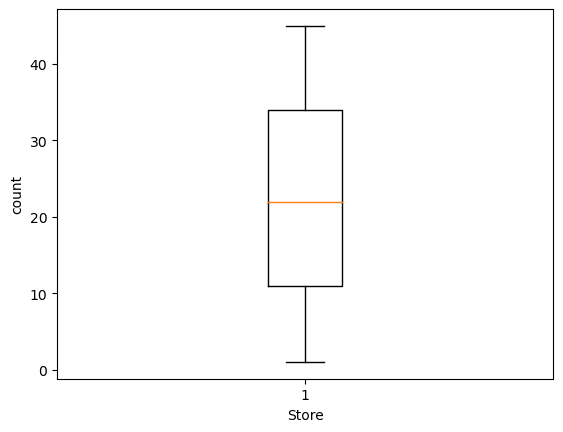

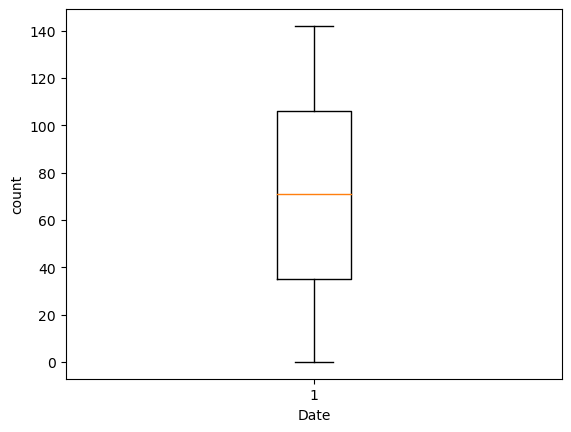

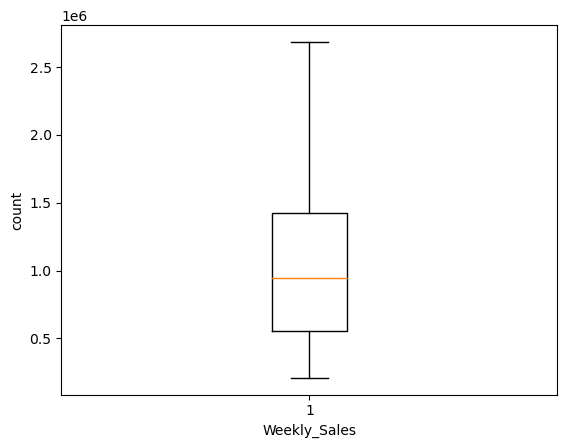

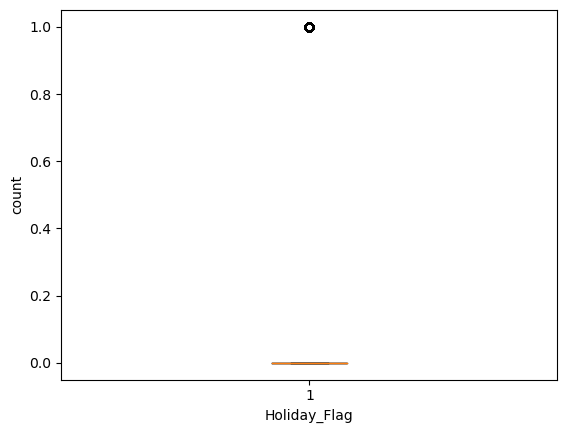

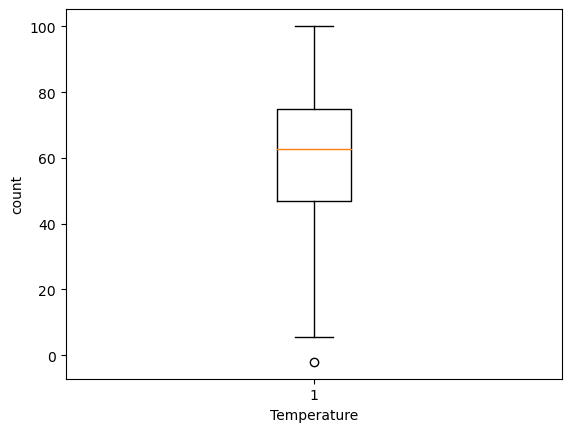

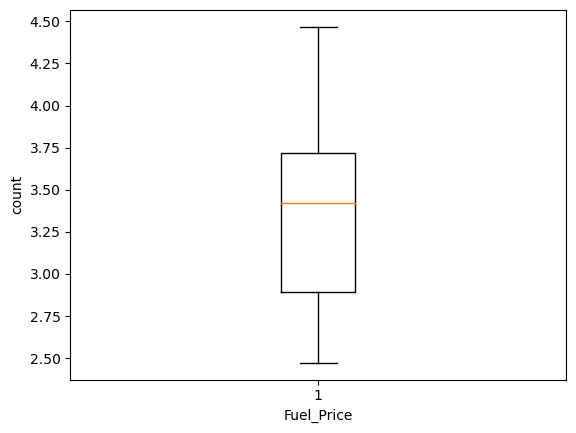

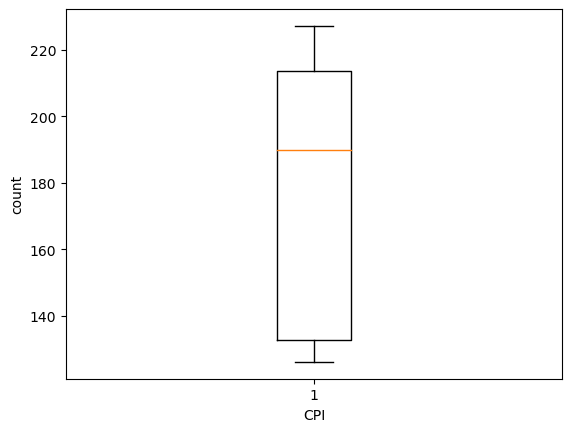

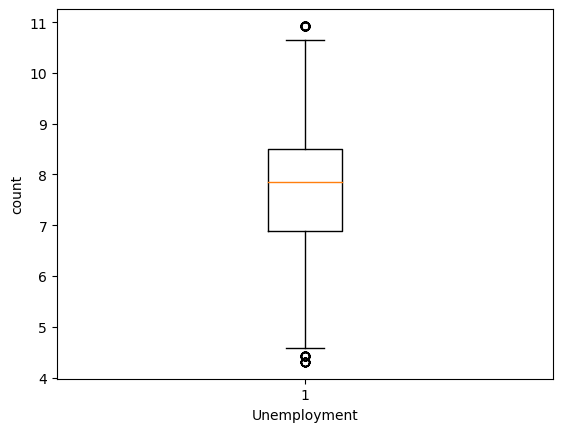

In [14]:
for col_name in df.columns:
    if (df[col_name].dtype != "object"):
        plt.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [15]:
df.corr()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000,0.004212,-0.319128,0.004353,-0.026186,0.047717,-0.208596,0.309445
Date,0.004212,1.000000,-0.030639,0.040960,0.038248,0.027876,0.004032,0.000148
Weekly_Sales,-0.319128,-0.030639,1.000000,0.024442,-0.040918,0.019767,-0.082957,-0.073227
Holiday_Flag,0.004353,0.040960,0.024442,1.000000,-0.156403,-0.076429,-0.000364,0.011014
Temperature,-0.026186,0.038248,-0.040918,-0.156403,1.000000,0.145789,0.218164,0.023905
Fuel_Price,0.047717,0.027876,0.019767,-0.076429,0.145789,1.000000,-0.144272,-0.105187
CPI,-0.208596,0.004032,-0.082957,-0.000364,0.218164,-0.144272,1.000000,-0.218764
Unemployment,0.309445,0.000148,-0.073227,0.011014,0.023905,-0.105187,-0.218764,1.000000


In [ ]:
plt.figure(figsize=(5,5))

df.plot(kind='bar')

In [ ]:
df.head()

In [ ]:
#a. If the weekly sales are affected by the unemployment rate, if yes - which storesare suffering the most?

In [ ]:
df['Weekly_Sales'].groupby(df['Store']).sum().sort_values()
#t=df.groupby('Store')['Weekly_Sales'].sum().sort_values() 


In [ ]:
#total_sales= walmart_data.groupby('Store')['Weekly_Sales'].sum().sort_values() 
t=df.groupby('Store')['Weekly_Sales'].sum().sort_values() 
t_array = np.array(t)

In [ ]:
plt.figure(figsize=(15,7))

t.plot(kind='bar')


In [ ]:
#a. If the weekly sales are affected by the unemployment rate, if yes - which storesare suffering the most?

In [ ]:
# b. If the weekly sales show a seasonal trend, when and what could be the reason?

There is no seasonal trend in 

   

In [ ]:
#c. Does temperature affect the weekly sales in any manner?

In [ ]:
# d. How is the Consumer Price index affecting the weekly sales of various stores?


In [ ]:
#sns.barplot(data =df)
sns.barplot(data=df, x="Weekly_Sales", y="Unemployment", hue="Store")


<Axes: xlabel='Weekly_Sales', ylabel='Unemployment'>

# a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

In [ ]:
# e. Top performing stores according to the historical data. 20


In [ ]:
fig=plt.figure(figsize=(10,10))
sns.barplot(x ="Weekly_Sales",y = "Store",data =df ,hue="Store")
#sns.barplot(x=data1['cylinders'],y=data1['mpg'], data = data1, hue=data1['brand'])
sns.despine(fig)
#sns.barplot(data=df)
#plt.barplot(data=df, hue=df['Store'])
#sns.barplot(x=df[''],y=data1['mpg'], data = data1, hue=data1['brand'])
#sns.barplot(dat

In [ ]:
#plt.bar(data=df,,height=10)
#plt.show()

In [ ]:
fig = plt.figsize =(20,10)
sns.barplot(x=df['Weekly_Sales'],y=df['Unemployment'], data = df, hue=df['Store'])
